<a href="https://colab.research.google.com/github/keshav3010/Diabetic-Retinopathy-Detection/blob/master/cnn_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.callbacks import TensorBoard
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")

Mounted at /content/drive
Note: using Google CoLab


In [0]:
IMG_SIZE = 200
Categories = ["No DR", "Mild", "Moderate","Severe","Proliferative DR"]
#/content/drive/My Drive/aptos2019-blindness-detection/train_labels_new .pickle

In [0]:
train_images_new = pickle.load(open("../content/drive/My Drive/aptos2019-blindness-detection/train_images_new(3).pickle", "rb"))
train_labels_new = pickle.load(open("../content/drive/My Drive/aptos2019-blindness-detection/train_labels_new(3).pickle", "rb"))

In [0]:
test_images_new=pickle.load(open("../content/drive/My Drive/aptos2019-blindness-detection/test_images_new.pickle", "rb"))

test_images_new = test_images_new/255.0
test_images_new = test_images_new.reshape(-1,200,200,1)
test_images_new.shape

(6, 200, 200, 1)

In [0]:
train_images_new = train_images_new/255.0
train_images_new = train_images_new.reshape(-1,200,200,1)
train_images_new.shape

(3648, 200, 200, 1)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = train_images_new.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))


model.add(tf.keras.layers.Conv2D(64, (3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
        
        
model.add(tf.keras.layers.Flatten())




model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation("relu"))

          
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Activation("softmax"))



model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])
model.fit(train_images_new, train_labels_new, batch_size = 20, epochs = 8, validation_split = 0.2)

Train on 2918 samples, validate on 730 samples
Epoch 1/8
2918/2918 [==============================] - 10s 3ms/sample - loss: 0.9612 - acc: 0.6744 - val_loss: 0.7331 - val_acc: 0.7055
Epoch 2/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.7722 - acc: 0.7145 - val_loss: 0.7498 - val_acc: 0.7370
Epoch 3/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.7245 - acc: 0.7385 - val_loss: 0.6984 - val_acc: 0.7233
Epoch 4/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.6476 - acc: 0.7670 - val_loss: 0.7058 - val_acc: 0.7370
Epoch 5/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.5872 - acc: 0.7910 - val_loss: 0.7211 - val_acc: 0.7534
Epoch 6/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.4725 - acc: 0.8256 - val_loss: 0.7564 - val_acc: 0.7301
Epoch 7/8
2918/2918 [==============================] - 7s 2ms/sample - loss: 0.3586 - acc: 0.8684 - val_loss: 0.8223 - val_acc: 0.7589
Epoch 8

In [0]:
model.save("../content/drive/My Drive/aptos2019-blindness-detection/Graph_Classifier_CNN_World_200x200.model")




In [0]:
import cv2
def prepare(filepath):
    IMG_SIZE = 28
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
model = tf.keras.models.load_model("../content/drive/My Drive/aptos2019-blindness-detection/Graph_Classifier_CNN_World_200x200.model")

In [0]:
predictions = model.predict(train_images_new)


In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)


In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [0]:
class_names=["No DR", "Mild", "Moderate","Severe","Proliferative DR"]
train_images_new = train_images_new.reshape(-1,200,200)

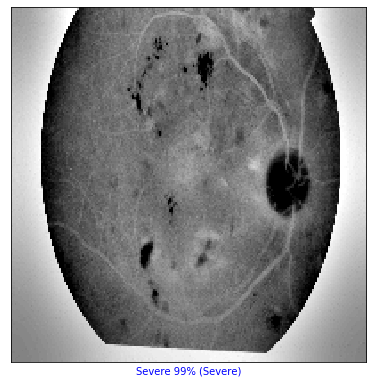

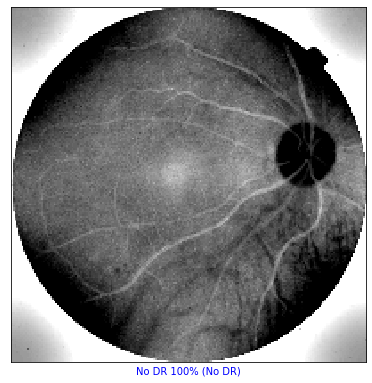

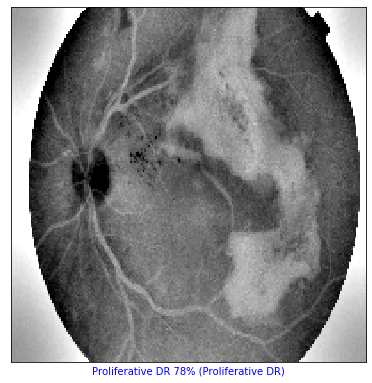

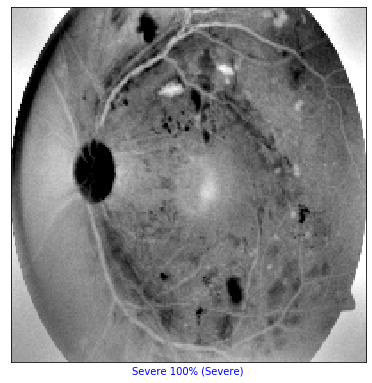

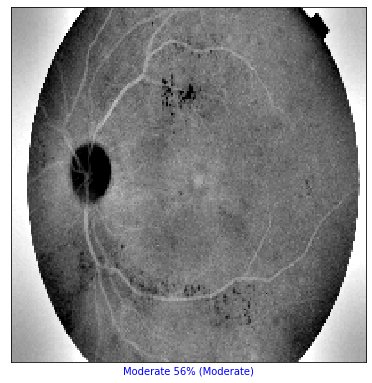

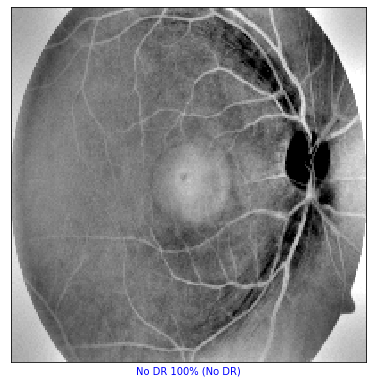

In [0]:
for i in range(0,6):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,2)
    plot_image(i, predictions, train_labels_new, train_images_new)
    #plt.subplot(1,2,2)
    #plot_value_array(i, predictions, test_labels)
    plt.show()